In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('TEST (1).csv')

In [2]:
df

,windspeed,rainfall24,rainfall6,rainfallaverage,area,yield,distance,areayieldrataio,percentageofarea,darea,yielda,fgprice,dctrice
0,0.000000,1.535972,3.032222,0.959983,2870.00,3.37,0.00000,851.632047,0.247070,709.091324,0.832626,20.79,1.113550e+07
1,0.000000,2.141071,3.942857,1.338170,491.00,4.36,0.00000,112.614679,0.244428,120.014173,1.065706,20.79,2.412279e+06
2,7.116629,5.809375,20.589580,3.630859,1330.88,4.42,385.79860,301.104072,0.312983,416.543187,1.383386,20.79,1.086828e+07
3,67.089467,3.908854,11.341670,2.443034,5767.00,4.65,26.26015,1240.215054,0.567852,3274.800267,2.640510,20.79,1.630911e+08
4,0.000000,0.805469,1.580208,0.503418,4710.00,4.14,0.00000,1137.681159,0.130472,614.521934,0.540153,20.79,6.260539e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,8.841748,2.292639,4.211667,1.432899,916.00,3.16,392.92250,289.873418,0.203710,186.598393,0.643724,20.79,2.265505e+06
39740,0.000000,0.030208,0.062500,0.018880,1046.00,3.07,0.00000,340.716612,0.556501,582.100434,1.708459,20.79,1.875686e+07
39741,8.575491,2.652500,5.460000,1.657812,753.00,4.52,291.88280,166.592920,0.161440,121.564092,0.729707,20.79,1.673060e+06
39742,9.387123,1.696181,3.348611,1.060113,99.00,1.93,496.10710,51.295337,0.154780,15.323183,0.298725,20.79,8.633316e+04


In [3]:
# Split the dataset into features and target variable
X = df.drop(['percentageofarea','area','yield','areayieldrataio','rainfallaverage','fgprice','windspeed'], axis=1)
y = df.drop(['darea','percentageofarea','yielda','dctrice','rainfall24','rainfall6','rainfallaverage','areayieldrataio','area', 'yield', 'fgprice','distance'], axis=1)

In [4]:
# Remove the rows with zero values from the training set and testing set
mask = y['windspeed'] != 0

# Apply the mask to X_train
X = X[mask]

# Apply the mask to y_train
y = y[mask]

In [5]:
# Remove the rows with zero values from the training set and testing set
mask =X['dctrice'] != 0

# Apply the mask to y_train
y = y[mask]

# Apply the mask to X_train
X = X[mask]

In [6]:
X.shape, y.shape

((15401, 6), (15401, 1))

In [7]:
# Training and Temporary Set (80-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Temporary set into a validation set and a test set using (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
y_train

,windspeed
2998,27.070846
16149,6.019287
1106,31.306583
1368,8.704666
8530,13.493266
...,...
14774,6.202194
35629,3.809631
15169,5.281554
2172,25.377307


In [9]:
X_train.shape, y_train.shape

((12320, 6), (12320, 1))

In [10]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   windspeed  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rainfall24  12320 non-null  float64
 1   rainfall6   12320 non-null  float64
 2   distance    12320 non-null  float64
 3   darea       12320 non-null  float64
 4   yielda      12320 non-null  float64
 5   dctrice     12320 non-null  float64
dtypes: float64(6)
memory usage: 673.8 KB


In [11]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [12]:
X_train.shape, y_train.shape

((12320, 6), (12320, 1))

In [13]:
X_train.shape, y_train.shape

((12320, 6), (12320, 1))

In [14]:
X_val

,rainfall24,rainfall6,distance,darea,yielda,dctrice
31511,0.007738,0.027381,150.223900,19.625815,0.491842,166383.41
31001,2.393229,6.691667,3.731118,12.878894,0.558085,123889.89
38328,3.350521,6.300000,280.959300,296.667121,0.398589,1536174.95
8001,0.094583,0.213333,85.724430,300.465465,0.407646,2111223.37
31097,0.000000,0.000000,197.586500,108.629224,0.851640,1594627.94
...,...,...,...,...,...,...
7596,0.546875,1.597917,74.362240,32.378801,0.483133,269639.60
36565,0.422128,0.422128,353.282200,84.405962,1.606316,1761368.40
11299,0.000000,0.000000,213.400400,686.206068,1.860157,22001926.78
6724,0.056042,0.122500,190.806200,322.134634,1.059653,5883799.95


In [15]:
y_train

,windspeed
2998,27.070846
16149,6.019287
1106,31.306583
1368,8.704666
8530,13.493266
...,...
14774,6.202194
35629,3.809631
15169,5.281554
2172,25.377307


In [16]:
# Null Remover

nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [17]:
# Null Remover

nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

print(np.where(pd.isnull(X_val)))

(array([], dtype=int64), array([], dtype=int64))


In [18]:
X_train.shape,y_train.shape

((12320, 6), (12320, 1))

In [19]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [20]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import load, dump
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

# Load the models
svr_pipeline = load('SVR-WS.joblib')
rf = load('RFR-WS.joblib')


final_estimator = RandomForestRegressor(
    
    n_estimators=100, 
    max_depth=20, 
    min_samples_split=2, 
    min_samples_leaf=2, 
    max_leaf_nodes=100,
    random_state=42,
)

# Create a StackingRegressor
stacking_regressor = StackingRegressor(
    estimators=[('svr', svr_pipeline), ('rf', rf)],
    final_estimator=final_estimator
)

stacking_regressor.fit(X_train, y_train)


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('svr',
                               Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('svr',
                                                SVR(C=1, coef0=3, degree=2,
                                                    gamma='auto',
                                                    kernel='poly'))])),
                              ('rf',
                               Pipeline(steps=[('randomforestregressor',
                                                RandomForestRegressor(max_depth=20,
                                                                      max_leaf_nodes=100,
                                                                      min_samples_leaf=2,
                                                                      random_state=42))]))],
                  final_estimator=RandomForestRegressor(max_depth=20,
                       

In [21]:

predictions = stacking_regressor.predict(X_test)

# Evaluate the model
r2 = stacking_regressor.score(X_test, y_test)
print(f'R-squared (Test): {r2}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (Test): {mae}')

predictionsVal = stacking_regressor.predict(X_val)

# Evaluate the model


r2 = stacking_regressor.score(X_val, y_val)
print(f'\nR-squared (Validation): {r2}')
maev = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maev}')

# Assuming `predictions` are the predicted values from your model
explained_variance = explained_variance_score(y_test, predictions)
print(f'\nExplained Variance (Test): {explained_variance}')


explained_variance = explained_variance_score(y_val, predictionsVal)
print(f'Explained Variance (Validation): {explained_variance}')


# Calculate and print MAE in percentage points for test set
mae_percentage_test = (mae / y_test.values.mean()) * 100
print(f'\nMean Absolute Error (Test, p.p.): {mae_percentage_test}%')

# Calculate and print MAE in percentage points for test set
mae_percentage_val = (mae / y_val.values.mean()) * 100
print(f'Mean Absolute Error (Validation, p.p.): {mae_percentage_val}%')


R-squared (Test): 0.8249922584010679
Mean Absolute Error (Test): 3.6086663083377233

R-squared (Validation): 0.8229911839585484
Mean Absolute Error (Validation): 3.591690748546571

Explained Variance (Test): 0.8249990613845275
Explained Variance (Validation): 0.823001541504712

Mean Absolute Error (Test, p.p.): 25.580613091903132%
Mean Absolute Error (Validation, p.p.): 26.25963176099025%


In [22]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12320 entries, 2998 to 18976
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   windspeed  12320 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB


In [23]:
print(['{:.2f}'.format(pred) for pred in predictionsVal])

['18.38', '48.53', '7.86', '24.61', '14.12', '46.52', '5.72', '33.12', '7.81', '16.27', '58.33', '5.75', '11.18', '7.82', '7.82', '66.51', '6.03', '11.75', '7.89', '5.18', '20.27', '6.02', '9.57', '6.02', '6.02', '20.39', '16.27', '5.61', '6.25', '7.75', '31.30', '4.17', '16.27', '57.24', '6.65', '5.84', '27.94', '7.27', '7.77', '7.82', '9.78', '16.30', '5.70', '10.95', '26.71', '6.02', '10.96', '9.49', '5.99', '7.89', '13.34', '4.67', '16.82', '11.05', '4.17', '9.49', '7.15', '6.02', '9.97', '6.03', '11.04', '16.17', '10.46', '6.02', '24.78', '7.75', '14.93', '9.49', '22.97', '10.85', '6.03', '54.41', '34.22', '16.73', '7.82', '7.82', '21.14', '7.10', '5.70', '6.02', '6.02', '10.95', '6.02', '5.60', '24.91', '18.98', '35.33', '6.03', '17.91', '5.77', '52.89', '25.23', '4.17', '16.21', '35.35', '12.83', '10.95', '4.17', '35.29', '16.16', '7.82', '7.86', '4.22', '35.30', '16.19', '14.21', '18.18', '7.27', '4.22', '4.40', '35.01', '7.78', '7.89', '5.61', '13.55', '20.35', '7.80', '6.03',

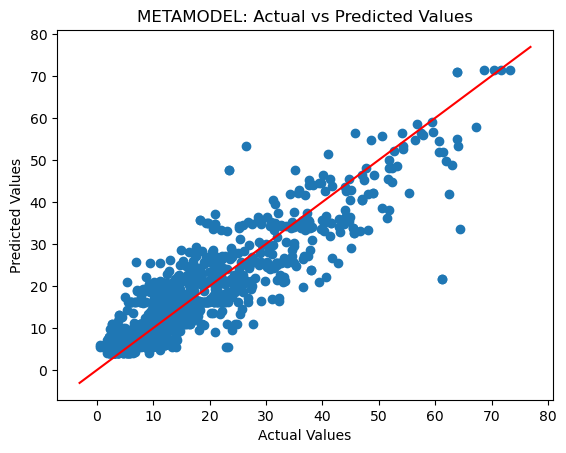

In [24]:
import matplotlib.pyplot as plt

# Make predictions
predictions = stacking_regressor.predict(X_test)

# Create a scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('METAMODEL: Actual vs Predicted Values')

# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

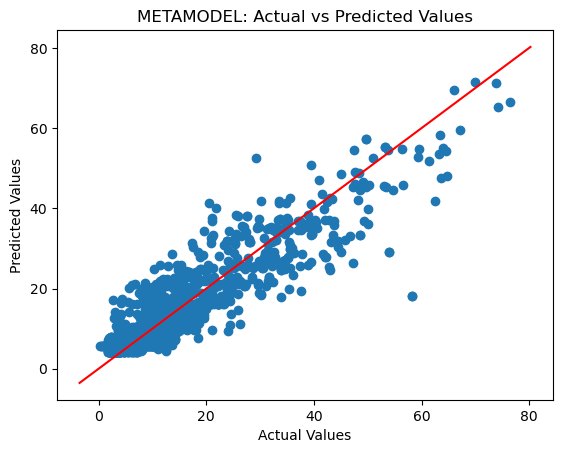

In [25]:
import matplotlib.pyplot as plt

# Make predictions
predictionsVal = stacking_regressor.predict(X_val)

# Create a scatter plot
plt.scatter(y_val, predictionsVal)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('METAMODEL: Actual vs Predicted Values')

# Diagonal line
limits = [np.min([plt.xlim(), plt.ylim()]),  # find the lower limit among x and y axes
          np.max([plt.xlim(), plt.ylim()])]  # find the upper limit among x and y axes
plt.plot(limits, limits, color='red')

plt.show()

In [26]:
import pandas as pd
import numpy as np

# Ensure y_test and predictions are 1-dimensional
y_test = np.ravel(y_test)
predictions = np.ravel(predictions)

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': ['{:.2f}'.format(pred) for pred in predictions]})

# Display the DataFrame
print(df.head(20).to_string(index=True))

       Actual Predicted
0    8.960080     10.91
1   10.422660     12.87
2   14.319559     13.98
3   16.478015     10.91
4    2.633899      6.03
5   32.755669     34.33
6   30.259301     25.62
7   12.869050     18.92
8    6.328230      6.03
9    5.038191      6.03
10   0.617172      5.61
11   6.736272     10.79
12  11.352024      9.52
13   6.257791      6.02
14   9.504757     11.04
15  15.803106     14.12
16  15.318071     21.27
17   4.362445      6.02
18   4.550682      6.03
19  24.000701     28.31


In [27]:
from sklearn.pipeline import make_pipeline
from joblib import dump

pipeline = make_pipeline(stacking_regressor)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
dump(pipeline, 'STACKED-SVR_RF-WS.joblib')

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['STACKED-SVR_RF-WS.joblib']